Import the needed packages and add inline magic command for matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Visualization with Seaborn**
Matplotlib is a useful tool, but it leaves much to be desired. There are several valid complaints about matplotlib that often come up:

- Matplotlib's defaults are not exactly the best choices. It was based off of MatLab circa 1999, and this shows.
- Matplotlib is relatively low-level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
- Matplotlib is not designed for use with Pandas dataframes. In order to visualize data from a Pandas dataframe, you must extract each series and often concatenate these series' together into the right format.

The answer to these problems is Seaborn. Seaborn provides an interface or wrapper on top of matplotlib which uses sane plot & color defaults, uses simple functions for common statistical plot types, and which integrates with the functionality provided by Pandas dataframes.

Seaborn is popular and by convention is imported as sns. We can set the seaborn style as the default matplotlib style by calling sns.set(): after doing this, even simple matplotlib plots will look much better. Let's look at a before and after:

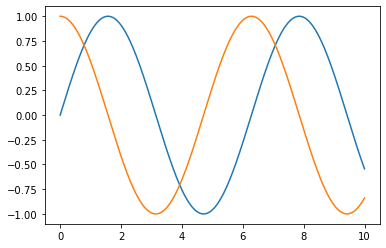

In [2]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), x, np.cos(x));

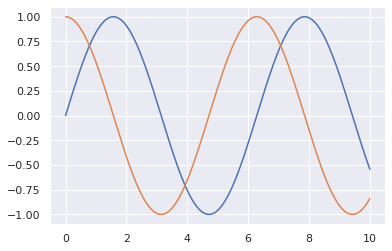

In [3]:
import seaborn as sns
sns.set()
plt.plot(x, np.sin(x), x, np.cos(x));

The above two figures show the difference in the default Matplotlib and Seaborn plots. The representation of data is the same, but there is a slight difference in the styling of these plots.

Seaborn supports various themes that can make styling the plots really easy and save a lot of time. Using the set_style() function of Seaborn we can set any of the themes available on Seaborn library. Here are a few of the popular themes:

- Darkgrid
- Whitegrid
- Dark
- White
- Ticks

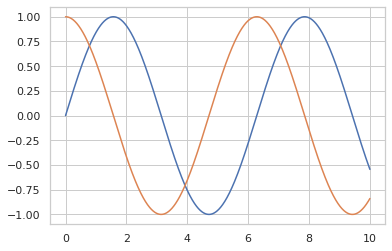

In [4]:
sns.set_style('whitegrid')
plt.plot(x, np.sin(x), x, np.cos(x));

Seaborn also allows us to control individual elements of our graphs and thus we can control the scale of these elements or the plot by using the set_context() function. We have four preset templates for contexts, based on relative size, the contexts are named as follows

- Paper
- Notebook
- Talk
- Poster

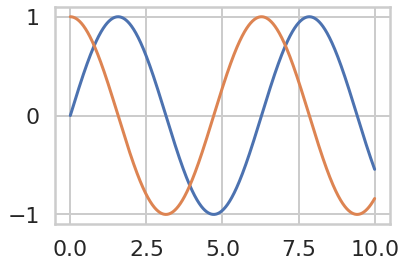

In [7]:
sns.set_style('whitegrid')
sns.set_context('poster')
plt.plot(x, np.sin(x), x, np.cos(x));

Lets set the context back to notebook

In [8]:
sns.set_context('notebook')

## **Exploring Seaborn Plots**
The main idea of Seaborn is that it can create complicated plot types from Pandas data with relatively simple commands.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all o the following could be done using raw matplotlib commands (this is, in fact, what Seaborn does under the hood) but the seaborn API is much more convenient.

Histograms, KDE, and Densities
Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. Seaborn provides simple tools to make this happen:

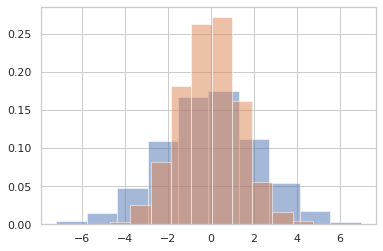

In [9]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation:

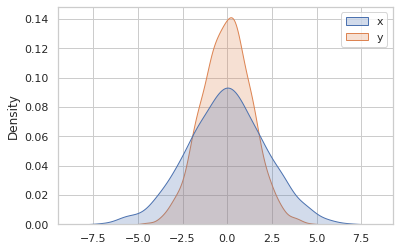

In [10]:
sns.kdeplot(data=data, shade=True);

If we pass `x` and `y` columns to `kdeplot`, we instead get a two-dimensional visualization of the joint density (see the following figure):

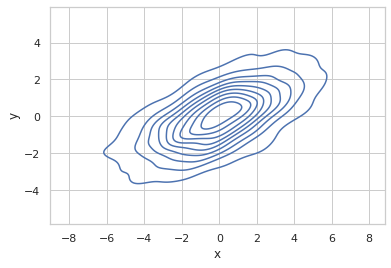

In [11]:
sns.kdeplot(data=data, x='x', y='y');

## **Pair Plots**

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. These are very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three Iris species. This dataset, among others, comes packaged with seaborn.

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot`` (see the following figure):

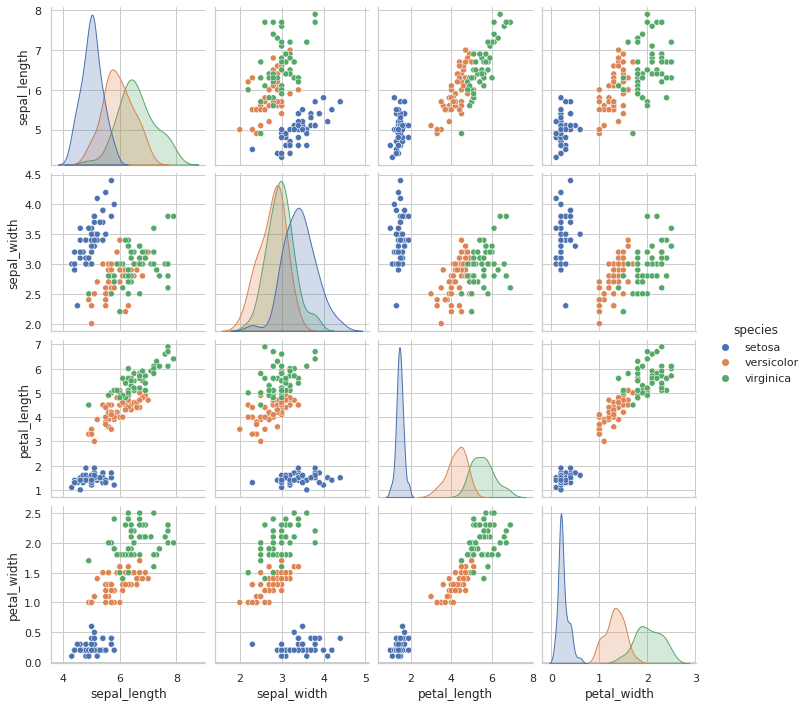

In [13]:
sns.pairplot(iris, hue='species', height=2.5);

---

<br>

#### *Task 7.1: Make a Pair Plot*

As can be seen below there are multiple dataset which can be loaded from seaborn. For this task load the dataset "penguins" and make a pair plot with a hue overlay of species and sex.

In [15]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


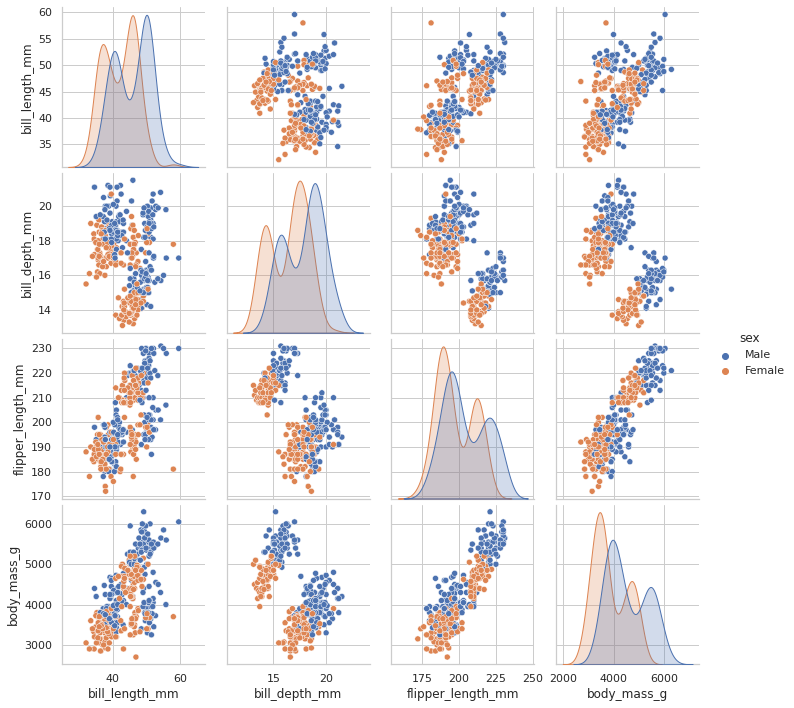

In [18]:
# Task 7.1
peng = sns.load_dataset("penguins")
sns.pairplot( peng, hue='sex', height=2.5);

---

<br>

## **Categorical Plots**

Lets take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

The restaurant staff data used in this section divides employees into two sexes: female and male. Biological sex isn’t binary, but the following discussion and visualizations are limited by this data.

In [19]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Categorical plots can be useful for some quick insights into the dataset. These allow you to view the distribution of a parameter within bins defined by any other parameter, as shown in the following figure:

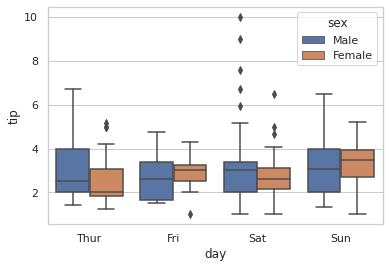

In [22]:
sns.boxplot(x="day", y="tip", data=tips, hue="sex");

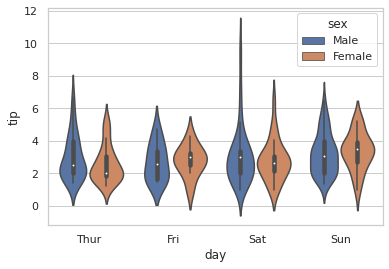

In [23]:
sns.violinplot( x="day", y="tip", data=tips, hue='sex');

<br>


#### *Task 7.2: Cat Plot*

Using the tip dataframe make a violin plot with the size feature along the x-axis and total_bill along the y-axis. Set the hue parameter to which to the categorical variable of your choice.  

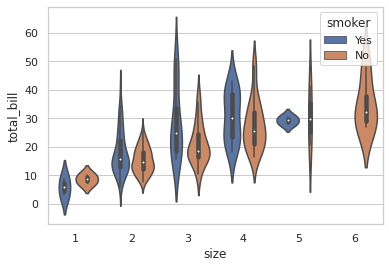

In [25]:
# Task 7.2

sns.violinplot( x="size", y="total_bill", data=tips, hue='smoker');

## **Joint Distributions**

Similar to the pair plot we saw earlier, we can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions:

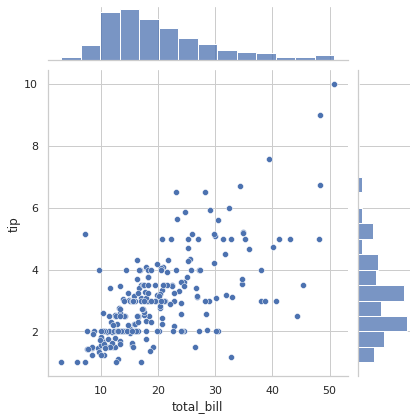

In [26]:
sns.jointplot(x="total_bill", y="tip", data=tips);

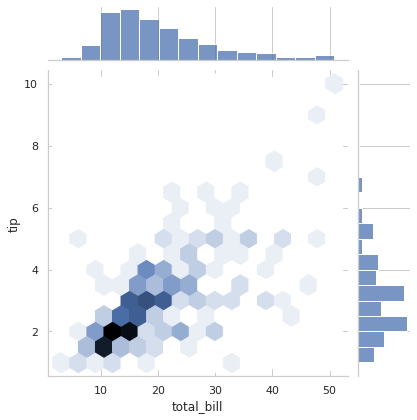

In [27]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex');

## **Heat and Cluster Maps**

As a simple example, consider the “flights” dataset, which records the number of airline passengers who flew in each month from 1949 to 1960.

In [28]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


We can use the pandas dataframe `.pivot()` function to restructure our data such that we have years for columns and monthes for rows.

In [29]:
flights = flights.pivot(index="month", columns="year", values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


Cluster map method plots a matrix dataset as a hierarchically-clustered heatmap. It uses hierarchical clusters to order data by similarity. This reorganizes the data for the rows and columns and displays similar content next to one another for even more depth of understanding the data.

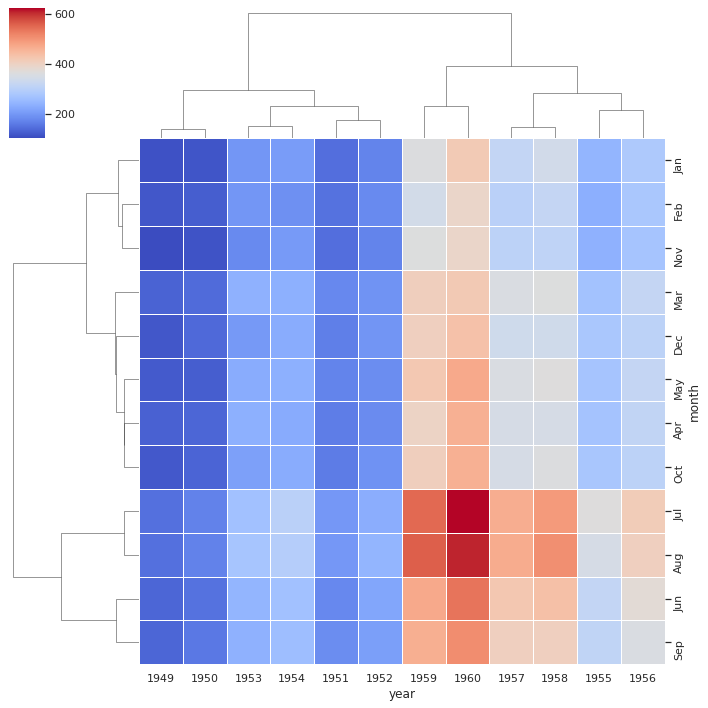

In [30]:
sns.clustermap( flights, linewidths=.5, cmap="coolwarm");

As you can see in this map all the columns and rows that have similar data together and now neither the years nor the months are in order as we saw in the heatmap. We can modify it a bit and only cluster rows or columns, here is how :



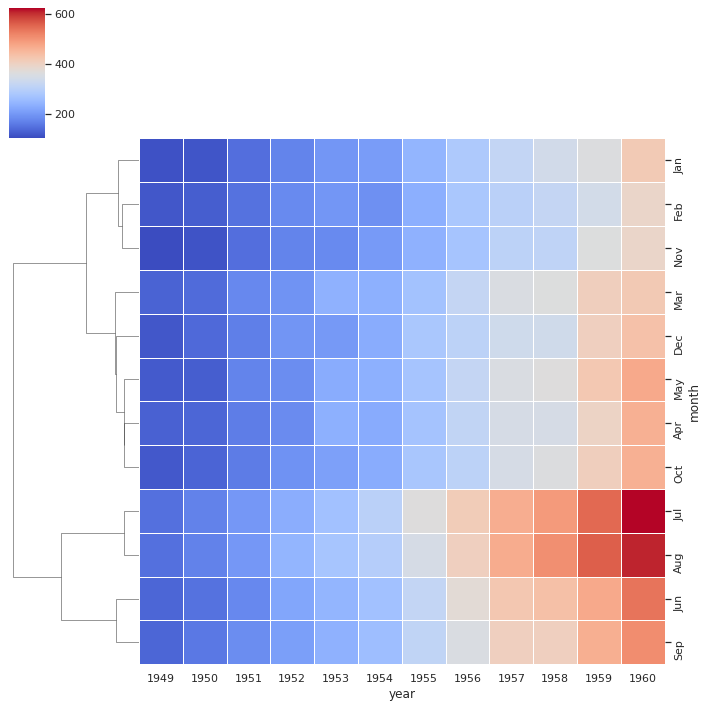

In [31]:
sns.clustermap( flights, linewidths=.5, cmap="coolwarm", col_cluster=False);

In [32]:
!pip install scipy

---

<br><br><br>

references:

- https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=bfrwmah66vGL
- https://github.com/oreillymedia/introduction-to-seaborn/blob/master/intro-to-seaborn.md